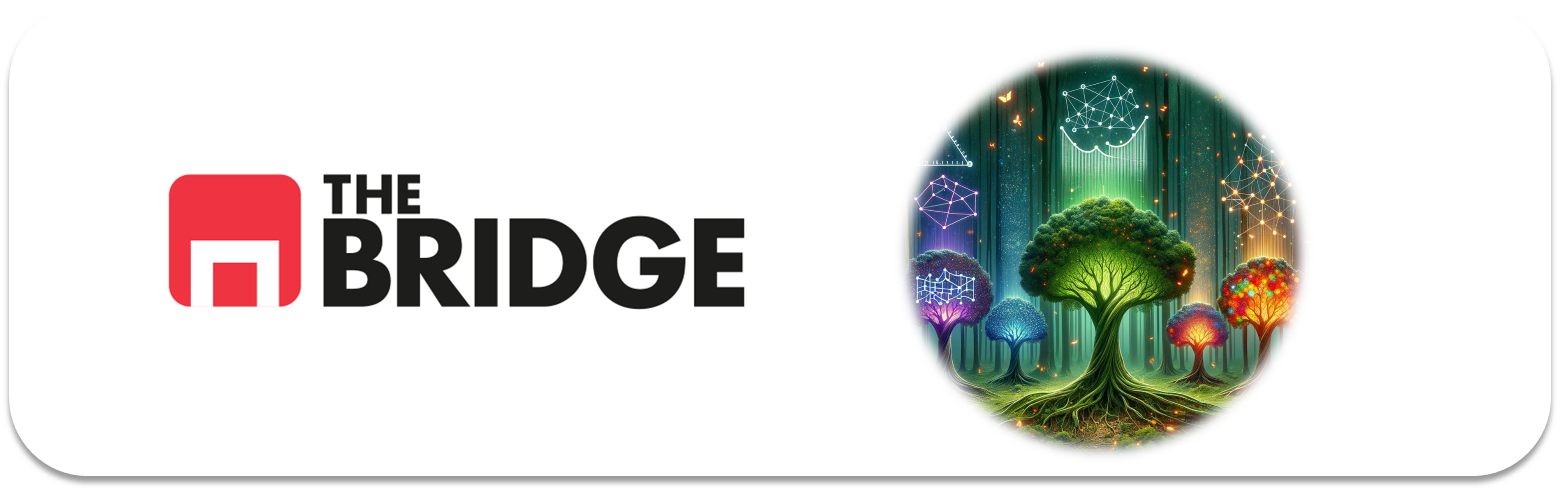

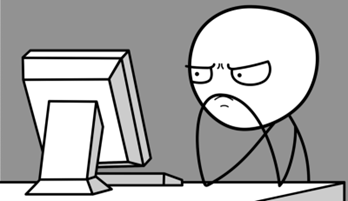

Para ejercitarte y afianzar lo aprendido sobre **Regresion con Árboles de decisión**, completa los siguientes ejercicios. Recuerda que necesitarás datos que están en el directorio data que acompaña al notebook (búscalo en el repositorio de ejercicios)
  
La solución a los mismos las tienes ya, intenta no mirarlos de primeras pero no dejes de hacerlo cuando hayas terminado por si te pudieran aportar.

Este conjunto de ejercicios trabajan sobre un dataset de temperaturas tomados de la ciudad de Seattle. El objetivo es intentar predecir lo mejor posible la máxima temperatura (columna `actual`) que alcanzaremos al día siguiente. Para ello contaremos con temperaturas de los dos días anteriores, históricos de máximas temperaturas y un amigo bastante chapas que te da su predicción del tiempo cada día.

**Resumen de datos**:
* year: 2016 for all data points
* month: number for month of the year
* day: number for day of the year
* week: day of the week as a character string
* temp_2: max temperature 2 days prior
* temp_1: max temperature 1 day prior
* average: historical average max temperature
* actual: max temperature measurement
* friend: your friend’s prediction, a random number between 20 below the average and 20 above the average



### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook

In [1]:
import numpy as np
import pandas as pd
import sklearn

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

import seaborn as sns


### Ejercicio 1

Importa el csv "temps.csv"

In [2]:
df = pd.read_csv('./data/temps.csv')
df

,year,month,day,week,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend
0,2016,1,1,Fri,45,45,45.6,45,43,50,44,29
1,2016,1,2,Sat,44,45,45.7,44,41,50,44,61
2,2016,1,3,Sun,45,44,45.8,41,43,46,47,56
3,2016,1,4,Mon,44,41,45.9,40,44,48,46,53
4,2016,1,5,Tues,41,40,46.0,44,46,46,46,41
...,...,...,...,...,...,...,...,...,...,...,...,...
343,2016,12,27,Tues,42,42,45.2,47,41,50,47,47
344,2016,12,28,Wed,42,47,45.3,48,41,49,44,58
345,2016,12,29,Thurs,47,48,45.3,48,43,50,45,65
346,2016,12,30,Fri,48,48,45.4,57,44,46,44,42


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 348 entries, 0 to 347
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   year            348 non-null    int64  
 1   month           348 non-null    int64  
 2   day             348 non-null    int64  
 3   week            348 non-null    object 
 4   temp_2          348 non-null    int64  
 5   temp_1          348 non-null    int64  
 6   average         348 non-null    float64
 7   actual          348 non-null    int64  
 8   forecast_noaa   348 non-null    int64  
 9   forecast_acc    348 non-null    int64  
 10  forecast_under  348 non-null    int64  
 11  friend          348 non-null    int64  
dtypes: float64(1), int64(10), object(1)
memory usage: 32.8+ KB


### Ejercicio 2

Haz un one-hot encoding de las variables categóricas del dataset

In [5]:
df = pd.get_dummies(df, 'week', dtype=int)

### Ejercicio 3

Divide en train y test

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.drop(columns='actual'), df.actual, test_size=0.2, random_state=42)

### Ejercicio 4

Instancia un DecisionTreeRegressor de sklearn con hiperparámetros por defecto y entrénalo.

In [8]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

### Ejercicio 5

Calcula su MAE sin usar sklearn.

In [13]:
y_pred = tree.predict(X_test)

suma = 0
for y, x in zip(y_pred, y_test):
    suma += abs(y - x)
MAE = suma/len(y_test)
print(f'MAE: {MAE}')

MAE: 4.8428571428571425


In [14]:
from sklearn.metrics import mean_absolute_error

print(mean_absolute_error(y_test, y_pred))

4.8428571428571425


### Ejercicio 6

Calcula su MAPE sin usar sklearn

In [15]:
suma = 0
for y, x in zip(y_test, y_pred):
    suma += abs((y - x)/y)
MAPE = suma/len(y_test)
print(f'MAPE: {MAPE}')

MAPE: 0.07659372168636985


In [17]:
from sklearn.metrics import mean_absolute_percentage_error

mean_absolute_percentage_error(y_test, y_pred)

0.07659372168636985

### Ejercicio 7

Representa el árbol de decision

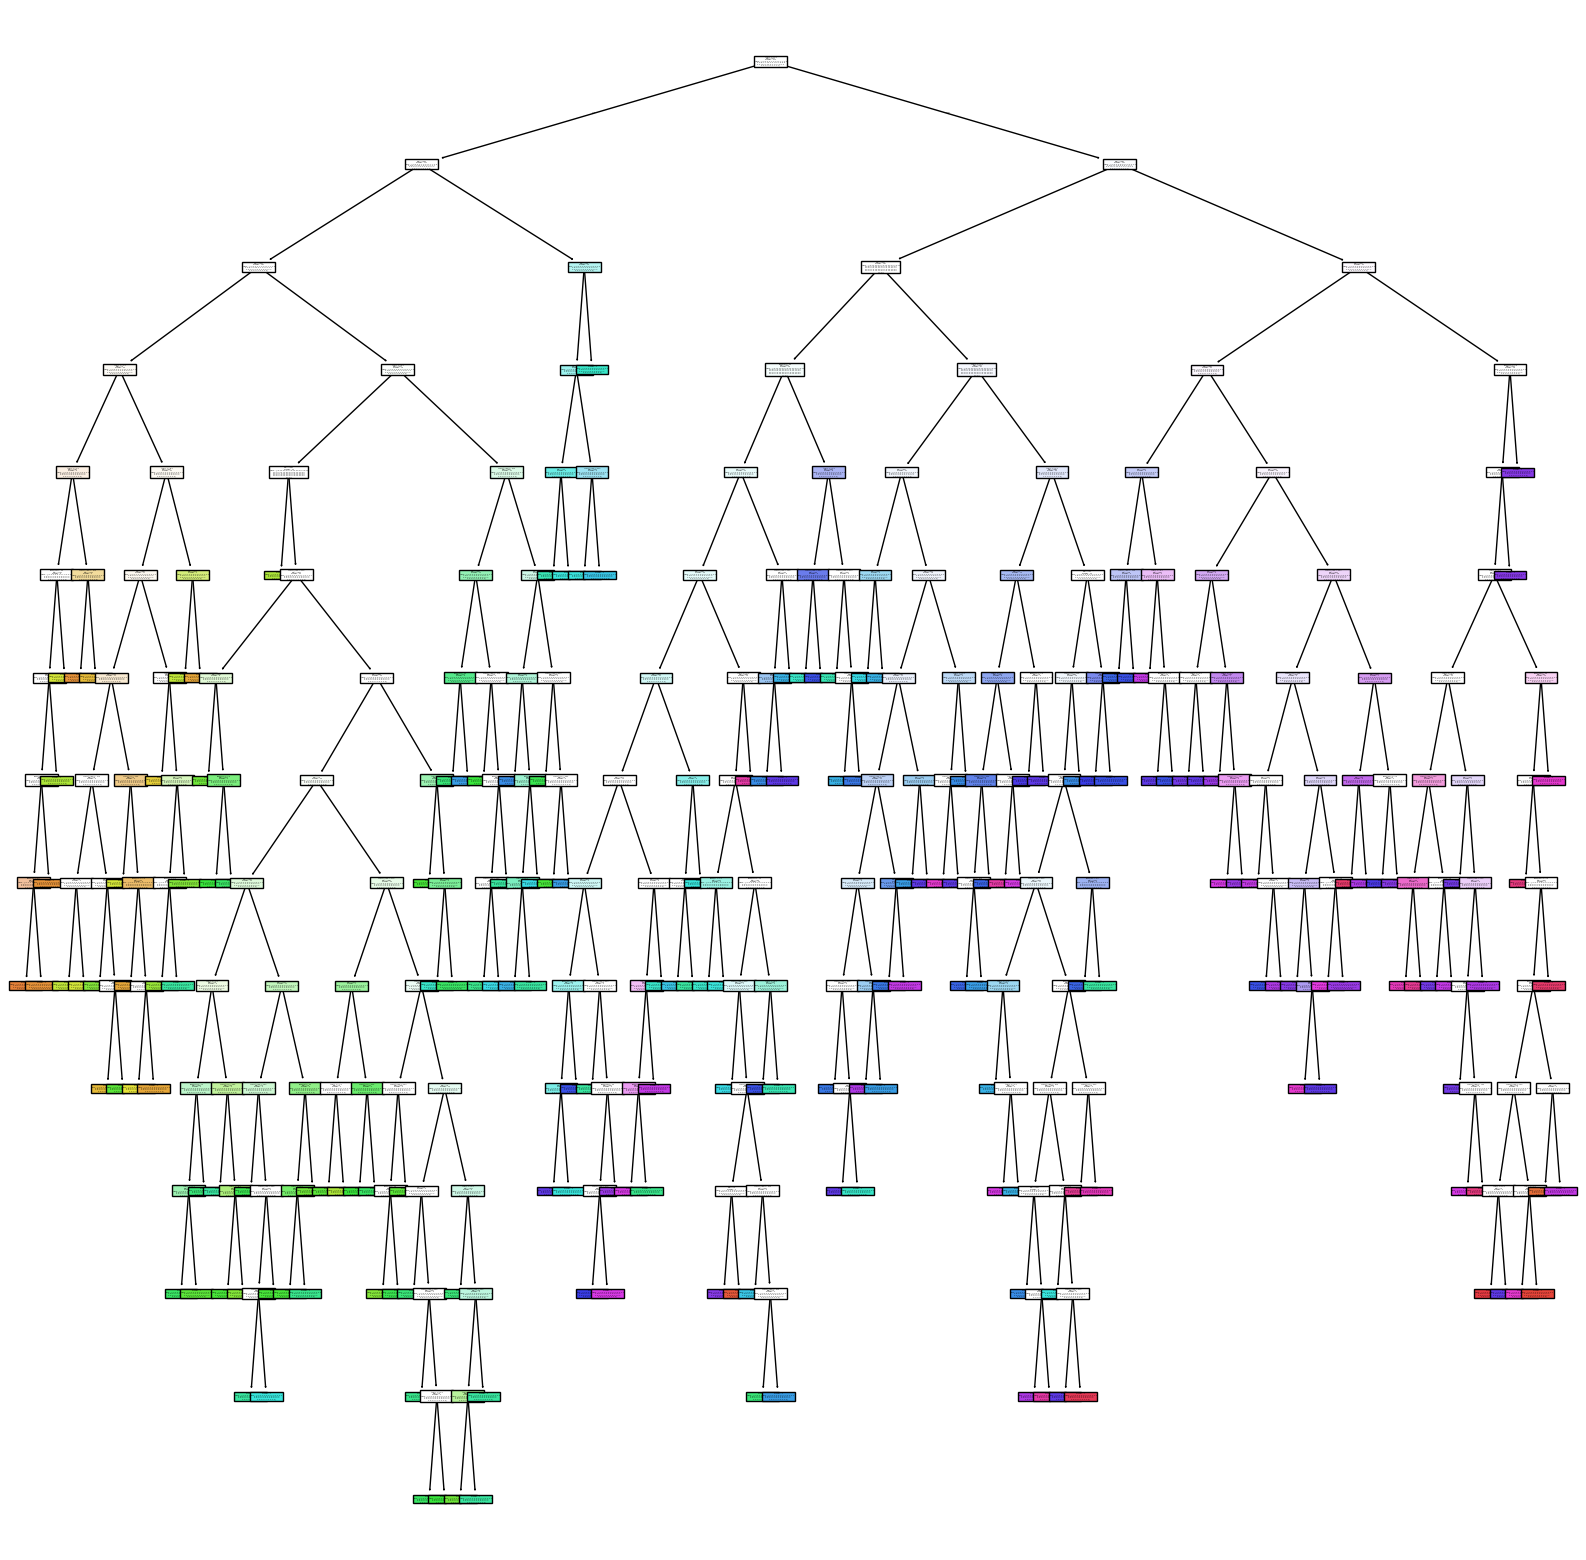

In [21]:
plt.figure(figsize=(20,20))
sklearn.tree.plot_tree(tree, feature_names=df.drop(columns='actual').columns,
                      filled=True);

### Ejercicio 8. 

Instancia un nuevo árbol ahora con max_depth a 3 y vuelve a entrenarlo

In [22]:
tree = DecisionTreeClassifier(max_depth=3, random_state=42)
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

### Ejercicio 9

Vuelve a calcular MAE y MAPE

In [23]:
y_pred = tree.predict(X_test)

print('MAE:', np.mean(abs(y_test - y_pred)))
print('MAPE:', np.mean(abs((y_test - y_pred)/y_test)))

MAE: 5.614285714285714
MAPE: 0.08503549091125537


### Ejercicio 10

Vuelve a representar su árbol

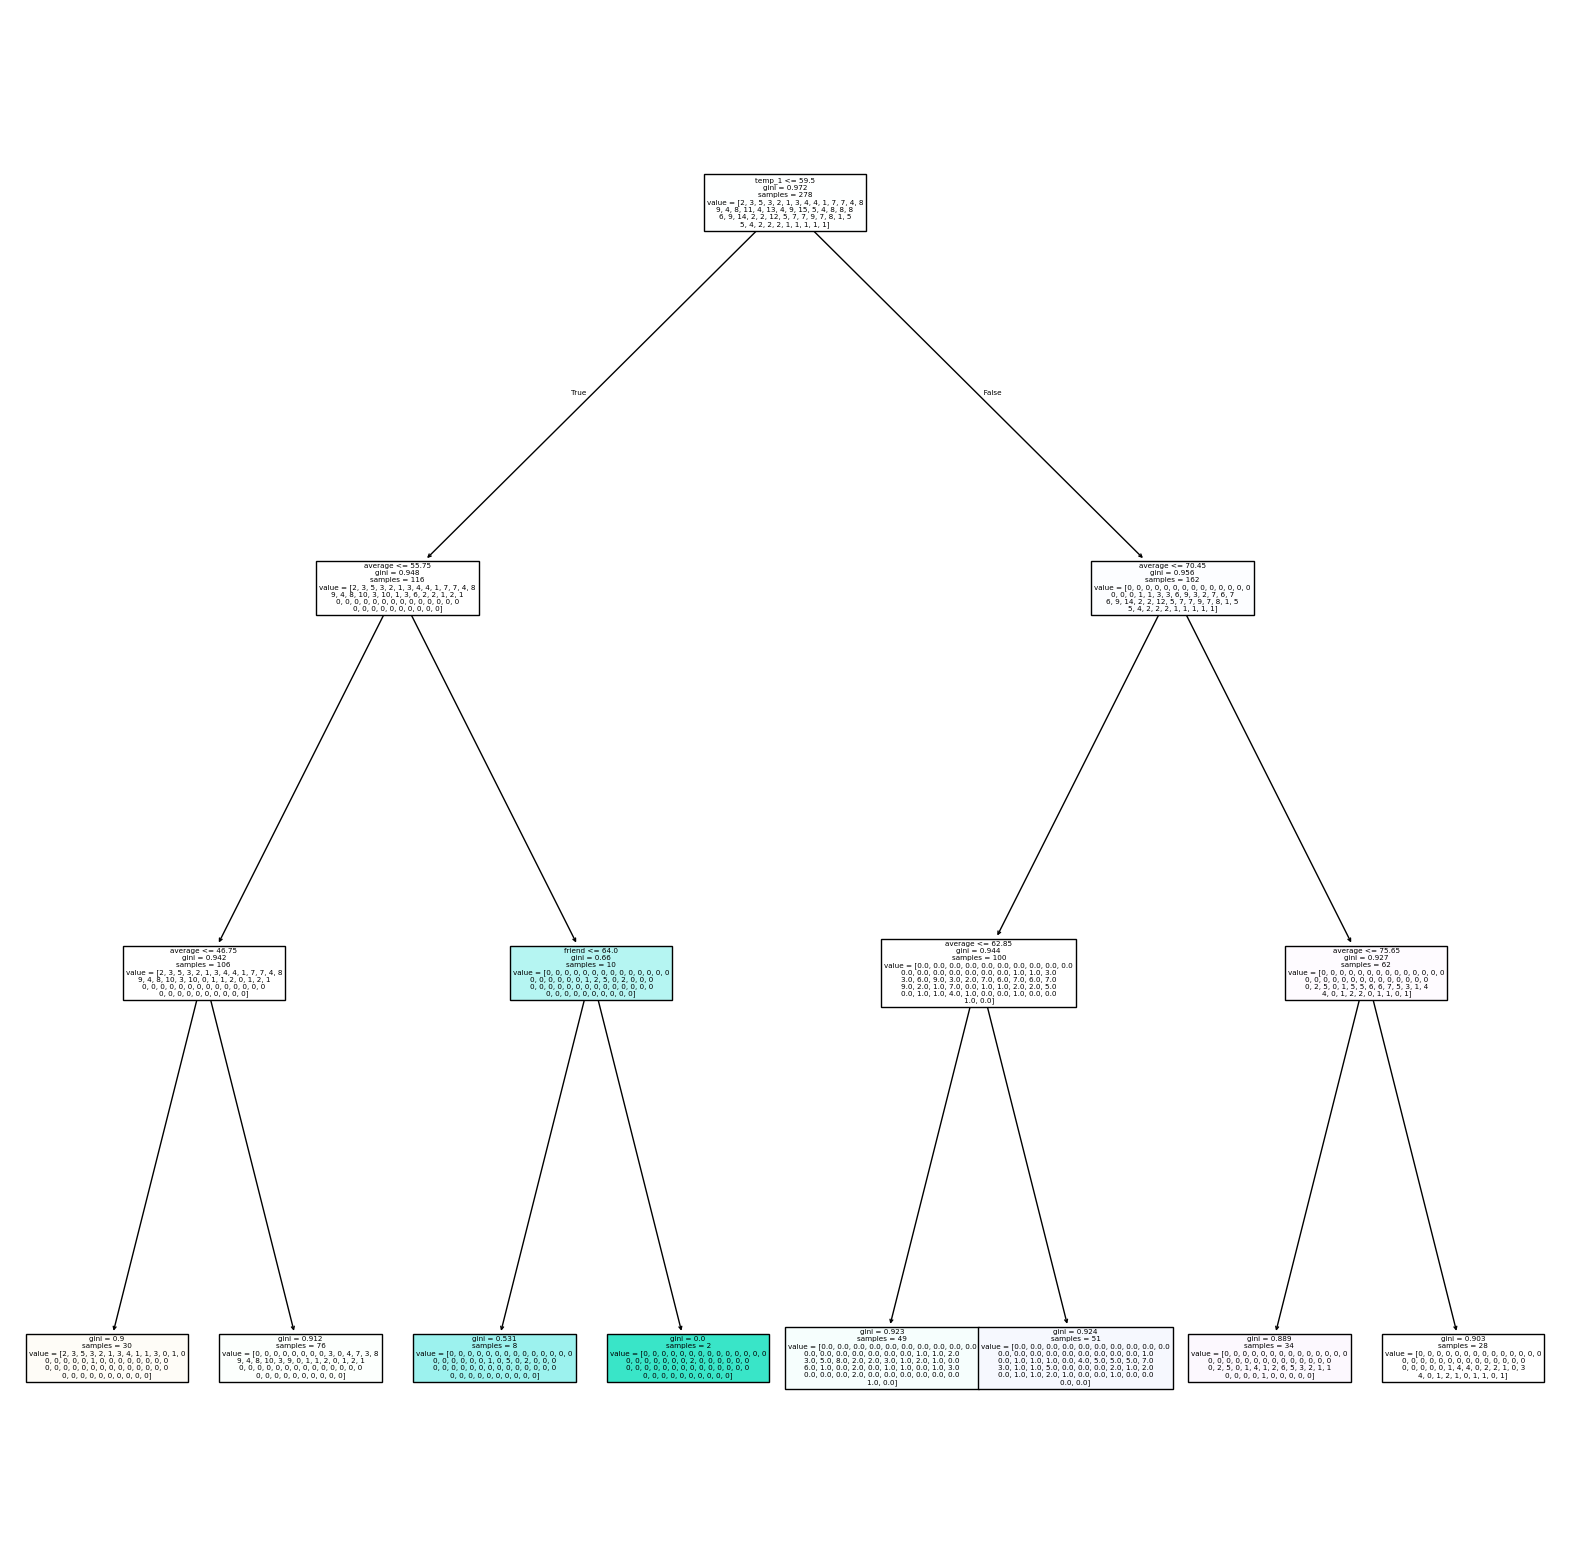

In [24]:
plt.figure(figsize=(20,20))
sklearn.tree.plot_tree(tree, feature_names=df.drop(columns='actual').columns,
                      filled=True);

### Ejercicio 11

Obten el `feature_importances` de cada variable en el último modelo. Los árboles una vez entrenados tienen un atributo que te lo permite, revisa la documentación si es necesario.

In [25]:
tree.feature_importances_

array([0.        , 0.        , 0.        , 0.        , 0.24673093,
       0.6455104 , 0.        , 0.        , 0.        , 0.10775867,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        ])